# Olympic Data Analysis with Web-Interface
This is an exciting data analysis project that focuses on 120 years of Olympic history, spanning from 1896 to 2016. With this project, you will have the opportunity to delve into every detail about the athletes, medal results, and countries involved in the Olympics. Through an engaging web-interface, you can visually explore the analysis and uncover every minute details about each player and country. Whether you are a sports enthusiast or simply curious about the history of the Olympic games, this project offers an immersive and informative experience that will satisfy your curiosity and expand your knowledge.
In this notebook I will be focusing on the Summber Olympics

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("athlete_events.csv") # COntains details about each player, where they were from, in which year they took part and else.
dff = pd.read_csv("noc_regions.csv") # Contains the regions

# Part 1 Medal-Wise-analysis

In [3]:
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [4]:
dff.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

## Since I am only analyzing the summer data

In [5]:
df = df[df["Season"] == "Summer"] # Assigning only the summer values to the main dataframe

In [6]:
df["Season"].unique() # Only summer data left now

array(['Summer'], dtype=object)

In [7]:
df.sample(5)

ID                         Name Sex   Age  Height  Weight  \
140521   70543                   Liu Ailing   F  29.0   168.0    55.0   
18078     9594          Choaib Belhaj Salah   M  29.0   194.0    86.0   
102164   51682  Jos Antonio Iglesias Bilbao   M  27.0   170.0    70.0   
207786  104285             Mojca Sagmeister   F  16.0   165.0    50.0   
241283  120857        Sanda Toma (-Nicolae)   F  22.0   175.0    71.0   

            Team  NOC        Games  Year  Season            City  \
140521     China  CHN  1996 Summer  1996  Summer         Atlanta   
18078    Tunisia  TUN  2016 Summer  2016  Summer  Rio de Janeiro   
102164     Spain  ESP  1992 Summer  1992  Summer       Barcelona   
207786  Slovenia  SLO  2012 Summer  2012  Summer          London   
241283   Romania  ROU  1992 Summer  1992  Summer       Barcelona   

                   Sport                                       Event   Medal  
140521          Football                   Football Women's Football  Silver  
18078   Beach Volleyball     Beach Volleyball Men's Beach Volleyball     NaN  
102164            Hockey                         Hockey Men's Hockey     NaN  
207786          Swimming       Swimming Women's 400 metres Freestyle     NaN  
241283          Canoeing  Canoeing Women's Kayak Doubles, 500 metres     NaN

## Just by bloocking at the NOC I wont know each country so to eradicate that I use the noc_region dataset to find out the each country and add a colum with its full country name

In [8]:
df = df.merge(dff, on="NOC", how="left") # Combing two dataframces based on a single common column named(NOC)

In [9]:
df.sample(10)

ID                                    Name Sex   Age  Height  \
71311    43474            Ricardo Guasch de la Huertas   M  30.0   180.0   
163069   99478       Serge Yvan Arthur Reding (Grard-)   M  22.0   173.0   
208466  127064                     Benjamin "Ben" Vogg   M  23.0   180.0   
31418    19324                     Gianmatteo Centazzo   M  22.0     NaN   
123172   75255                          Mourad Marofit   M  26.0   178.0   
155165   94675       Oleksandr Yuriyovych Pielieshenko   M  22.0   170.0   
2547      1638                 Joseph Mukuku Akhasamba   M  25.0   183.0   
19954    12589                       Pradip Bode Kumar   M   NaN     NaN   
104889   64428           Vladimir Valentinovich Krylov   M  24.0   184.0   
34488    21245  Johannes Laurs Christensen (-Granholm)   M  23.0     NaN   

        Weight          Team  NOC        Games  Year  Season            City  \
71311     81.0        Mexico  MEX  1964 Summer  1964  Summer           Tokyo   
163069   140.0       Belgium  BEL  1964 Summer  1964  Summer           Tokyo   
208466    73.0   Switzerland  SUI  2016 Summer  2016  Summer  Rio de Janeiro   
31418      NaN         Italy  ITA  1992 Summer  1992  Summer       Barcelona   
123172    62.0       Morocco  MAR  2008 Summer  2008  Summer         Beijing   
155165    85.0       Ukraine  UKR  2016 Summer  2016  Summer  Rio de Janeiro   
2547      80.0         Kenya  KEN  1988 Summer  1988  Summer           Seoul   
19954      NaN         India  IND  1952 Summer  1952  Summer        Helsinki   
104889    73.0  Soviet Union  URS  1988 Summer  1988  Summer           Seoul   
34488      NaN       Denmark  DEN  1912 Summer  1912  Summer       Stockholm   

                Sport                                            Event Medal  \
71311   Equestrianism          Equestrianism Mixed Jumping, Individual   NaN   
163069  Weightlifting                  Weightlifting Men's Heavyweight   NaN   
208466  Equestrianism  Equestrianism Mixed Three-Day Event, Individual   NaN   
31418      Gymnastics                 Gymnastics Men's Pommelled Horse   NaN   
123172      Athletics                     Athletics Men's 5,000 metres   NaN   
155165  Weightlifting            Weightlifting Men's Light-Heavyweight   NaN   
2547           Boxing                   Boxing Men's Light-Heavyweight   NaN   
19954         Cycling              Cycling Men's Road Race, Individual   NaN   
104889      Athletics             Athletics Men's 4 x 100 metres Relay  Gold   
34488       Athletics                         Athletics Men's Marathon   NaN   

             region notes  
71311        Mexico   NaN  
163069      Belgium   NaN  
208466  Switzerland   NaN  
31418         Italy   NaN  
123172      Morocco   NaN  
155165      Ukraine   NaN  
2547          Kenya   NaN  
19954         India   NaN  
104889       Russia   NaN  
34488       Denmark   NaN

In [10]:
# To check how many countries have participated till date from the starting of olympics to 2016
print("Total number of contries participated till now is:", df["region"].nunique())
print()
print("And these are the names of those participated countries are:\n\n", df["region"].unique())

Total number of contries participated till now is: 205

And these are the names of those participated countries are:

 ['China' 'Denmark' 'Netherlands' 'Finland' 'Norway' 'Romania' 'Estonia'
 'France' 'Morocco' 'Spain' 'Egypt' 'Iran' 'Bulgaria' 'Italy' 'Chad'
 'Azerbaijan' 'Sudan' 'Russia' 'Argentina' 'Cuba' 'Belarus' 'Greece'
 'Cameroon' 'Turkey' 'Chile' 'Mexico' 'USA' 'Nicaragua' 'Hungary'
 'Nigeria' 'Algeria' 'Kuwait' 'Bahrain' 'Pakistan' 'Iraq' 'Syria'
 'Lebanon' 'Qatar' 'Malaysia' 'Germany' 'Canada' 'Ireland' 'Australia'
 'South Africa' 'Eritrea' 'Tanzania' 'Jordan' 'Tunisia' 'Libya' 'Belgium'
 'Djibouti' 'Palestine' 'Comoros' 'Kazakhstan' 'Brunei' 'India'
 'Saudi Arabia' 'Maldives' 'Ethiopia' 'United Arab Emirates' 'Yemen'
 'Indonesia' 'Philippines' nan 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan'
 'Japan' 'Republic of Congo' 'Switzerland' 'Brazil' 'Monaco' 'Israel'
 'Uruguay' 'Sweden' 'Sri Lanka' 'Armenia' 'Ivory Coast' 'Kenya' 'Benin'
 'UK' 'Ghana' 'Somalia' 'Niger' 'Mali' 'Afghanist

In [11]:
print("Total number of sports played through the enitre olympic history is:", df["Sport"].nunique())
print()
print("Different sports played along these years are:\n\n", df["Sport"].unique())

Total number of sports played through the enitre olympic history is: 52

Different sports played along these years are:

 ['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics']


In [12]:
# Chekcing missing values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [13]:
print(f"There are {df.duplicated().sum()} duplicate rows in the dataset")

There are 1385 duplicate rows in the dataset


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum() # Duplicate features removed

0

## Doing One hot encoding in the medal column so that I can get the number of each medals for each country

In [16]:
pd.get_dummies(df["Medal"])

Bronze  Gold  Silver
0            0     0       0
1            0     0       0
2            0     0       0
3            0     1       0
4            0     0       0
...        ...   ...     ...
222547       0     0       0
222548       0     0       0
222549       0     0       0
222550       0     0       0
222551       0     0       0

[221167 rows x 3 columns]

In [17]:
# Now merging the above medal counts
df = pd.concat([df, pd.get_dummies(df["Medal"])], axis=1)

In [18]:
df.sample(10)

ID                              Name Sex   Age  Height  Weight  \
144013   87876  Lawrence Gerard "Larry" O'Connor   M  19.0   181.0    73.0   
212947  129854          Allison Elizabeth Weston   F  26.0   183.0    77.0   
14460     9141                  Dominique Bchard   M  20.0   185.0    85.0   
621        402                      Arthur Abele   M  22.0   184.0    85.0   
564        370                      Shigeaki Abe   M  28.0   178.0    70.0   
144542   88252                     Ayelet Ohayon   F  21.0   161.0    49.0   
63331    38532                     Celeste Garca   F  15.0   158.0    60.0   
38426    23618             Marius Vasile Cozmiuc   M  23.0   197.0    94.0   
160239   97747                    Alma Qeramixhi   F  28.0     NaN     NaN   
62455    37985                         tefan Gal   M  24.0   178.0    72.0   

                 Team  NOC        Games  Year  Season            City  \
144013         Canada  CAN  1936 Summer  1936  Summer          Berlin   
212947  United States  USA  2000 Summer  2000  Summer          Sydney   
14460       Mauritius  MRI  1984 Summer  1984  Summer     Los Angeles   
621           Germany  GER  2008 Summer  2008  Summer         Beijing   
564             Japan  JPN  1976 Summer  1976  Summer        Montreal   
144542         Israel  ISR  1996 Summer  1996  Summer         Atlanta   
63331            Peru  PER  1980 Summer  1980  Summer          Moskva   
38426         Romania  ROU  2016 Summer  2016  Summer  Rio de Janeiro   
160239        Albania  ALB  1992 Summer  1992  Summer       Barcelona   
62455         Romania  ROU  1976 Summer  1976  Summer        Montreal   

             Sport                                  Event Medal     region  \
144013   Athletics     Athletics Men's 110 metres Hurdles   NaN     Canada   
212947  Volleyball          Volleyball Women's Volleyball   NaN        USA   
14460    Athletics           Athletics Men's Hammer Throw   NaN  Mauritius   
621      Athletics              Athletics Men's Decathlon   NaN    Germany   
564     Basketball            Basketball Men's Basketball   NaN      Japan   
144542     Fencing             Fencing Women's Foil, Team   NaN     Israel   
63331     Swimming  Swimming Women's 200 metres Freestyle   NaN       Peru   
38426       Rowing             Rowing Men's Coxless Fours   NaN    Romania   
160239   Athletics           Athletics Women's Heptathlon   NaN    Albania   
62455   Gymnastics         Gymnastics Men's Parallel Bars   NaN    Romania   

       notes  Bronze  Gold  Silver  
144013   NaN       0     0       0  
212947   NaN       0     0       0  
14460    NaN       0     0       0  
621      NaN       0     0       0  
564      NaN       0     0       0  
144542   NaN       0     0       0  
63331    NaN       0     0       0  
38426    NaN       0     0       0  
160239   NaN       0     0       0  
62455    NaN       0     0       0

In [19]:
# First Groupby the entire dataframe with NOC Column and sort the values by the most number of golds won
df.groupby("region").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold", ascending=False).reset_index()

region    Gold  Silver  Bronze
0              USA  2472.0  1333.0  1197.0
1           Russia  1220.0   974.0   994.0
2          Germany  1075.0   987.0  1064.0
3               UK   635.0   729.0   620.0
4            Italy   518.0   474.0   454.0
..             ...     ...     ...     ...
200        Lesotho     0.0     0.0     0.0
201        Albania     0.0     0.0     0.0
202          Libya     0.0     0.0     0.0
203  Liechtenstein     0.0     0.0     0.0
204        Liberia     0.0     0.0     0.0

[205 rows x 4 columns]

In [20]:
df.groupby("NOC").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold", ascending=False).reset_index()
 # If you tally this info with wikipedia then this is entirely wrong because in this dataset the gold medals are distributed indivsually for team sprot
 # For eg. If USA won a gold in any team sport lets say hockey then instead of assigning 1 gold enitre players are being labeld as gold winners,
 # that is why the result is false in here

NOC    Gold  Silver  Bronze
0    USA  2472.0  1333.0  1197.0
1    URS   832.0   635.0   596.0
2    GBR   635.0   729.0   620.0
3    GER   592.0   538.0   649.0
4    ITA   518.0   474.0   454.0
..   ...     ...     ...     ...
225  AHO     0.0     1.0     0.0
226  LBR     0.0     0.0     0.0
227  LCA     0.0     0.0     0.0
228  LES     0.0     0.0     0.0
229  LBA     0.0     0.0     0.0

[230 rows x 4 columns]

In [21]:
# So to solve this we can drop duplicate values from the columns(team, noc, games, year, city, sport, event, medal) dropping this will leave only one
# medal for each team sport winners
medal_wise_analysis = df.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"])

In [22]:
medal_wise_analysis.shape # You can see the rows are drastically reduced

(105636, 20)

In [23]:
# Again grouping by with NOC in the new formed medal tally dataframe
medal_wise_analysis = medal_wise_analysis.groupby("NOC").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold", ascending=False).reset_index()
medal_wise_analysis["total"] = medal_wise_analysis["Gold"] + medal_wise_analysis["Silver"] + medal_wise_analysis["Bronze"]
medal_wise_analysis

NOC    Gold  Silver  Bronze   total
0    USA  1035.0   802.0   708.0  2545.0
1    URS   394.0   317.0   294.0  1005.0
2    GBR   278.0   317.0   300.0   895.0
3    GER   235.0   261.0   283.0   779.0
4    FRA   234.0   256.0   287.0   777.0
..   ...     ...     ...     ...     ...
225  AHO     0.0     1.0     0.0     1.0
226  LBR     0.0     0.0     0.0     0.0
227  LCA     0.0     0.0     0.0     0.0
228  LES     0.0     0.0     0.0     0.0
229  LBA     0.0     0.0     0.0     0.0

[230 rows x 5 columns]

In [24]:
medal_wise_analysis[medal_wise_analysis["NOC"] == "NEP"] # Nepal has no medas at all (SAD)

NOC  Gold  Silver  Bronze  total
151  NEP   0.0     0.0     0.0    0.0

## This data doesnt perfectly match to the wikipedia data because there are some exceptions included in the records that are dispayed in the wikipedia that is why the data may vary a little bit but the rankings are correct

<hr>
<hr>

# Now I will extract in which years the Olyampics were held.

In [25]:
df["Year"].unique() # These are the exact years when the olympics was held

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

In [26]:
df["Year"].unique().tolist() # Done this so that I can sort the years in ascending

[1992,
 2012,
 1920,
 1900,
 1932,
 1952,
 2000,
 1996,
 1912,
 1924,
 1948,
 2008,
 2016,
 2004,
 1984,
 1968,
 1972,
 1988,
 1936,
 1956,
 1960,
 1928,
 1976,
 1980,
 1964,
 1906,
 1904,
 1908,
 1896]

In [27]:
years = df["Year"].unique().tolist()
years.sort()

In [28]:
years.insert(0, "Overall")
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

### Now extracting the regions

In [29]:
Country = np.unique(df["region"].dropna().values).tolist() # Dropping the one nan value present in the region column converting it to list 

In [30]:
Country.sort() # Sorting alphabetically
Country.insert(0, "Overall")
Country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

<hr>
<hr>

# Defining a function which takes two inputs year and coutnry and depending upon the inputs the function will return the output on medal tally

In [31]:
medal_df = medal_wise_analysis = df.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"])

In [32]:
medal_df[(medal_df["region"] == "India") & (medal_df["Year"] == 2016)]

ID                      Name Sex   Age  Height  Weight   Team  \
1015       663     Sharath Kamal Achanta   M  34.0   186.0    85.0  India   
7065      4523               Seema Antil   F  33.0   182.0    92.0  India   
8713      5562               Aditi Ashok   F  18.0   173.0    57.0  India   
9202      5868                Manu Attri   M  23.0   172.0    73.0  India   
10070     6427      Lalita Shivaji Babar   F  27.0   166.0    50.0  India   
...        ...                       ...  ..   ...     ...     ...    ...   
182260  111467  Sathish Kumar Sivalingam   M  24.0   175.0    77.0  India   
195568  119515               Shiva Thapa   M  22.0   169.0    56.0  India   
198042  120871             Sandeep Tomar   M  25.0   168.0    61.0  India   
216942  132143       Vikas Krishan Yadav   M  24.0   177.0    69.0  India   
216985  132177      Mohammad Anas Yahiya   M  21.0   177.0    69.0  India   

        NOC        Games  Year  Season            City          Sport  \
1015    IND  2016 Summer  2016  Summer  Rio de Janeiro   Table Tennis   
7065    IND  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   
8713    IND  2016 Summer  2016  Summer  Rio de Janeiro           Golf   
9202    IND  2016 Summer  2016  Summer  Rio de Janeiro      Badminton   
10070   IND  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   
...     ...          ...   ...     ...             ...            ...   
182260  IND  2016 Summer  2016  Summer  Rio de Janeiro  Weightlifting   
195568  IND  2016 Summer  2016  Summer  Rio de Janeiro         Boxing   
198042  IND  2016 Summer  2016  Summer  Rio de Janeiro      Wrestling   
216942  IND  2016 Summer  2016  Summer  Rio de Janeiro         Boxing   
216985  IND  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   

                                              Event Medal region notes  \
1015                     Table Tennis Men's Singles   NaN  India   NaN   
7065                 Athletics Women's Discus Throw   NaN  India   NaN   
8713                        Golf Women's Individual   NaN  India   NaN   
9202                        Badminton Men's Doubles   NaN  India   NaN   
10070   Athletics Women's 3,000 metres Steeplechase   NaN  India   NaN   
...                                             ...   ...    ...   ...   
182260             Weightlifting Men's Middleweight   NaN  India   NaN   
195568                    Boxing Men's Bantamweight   NaN  India   NaN   
198042     Wrestling Men's Featherweight, Freestyle   NaN  India   NaN   
216942                    Boxing Men's Middleweight   NaN  India   NaN   
216985                   Athletics Men's 400 metres   NaN  India   NaN   

        Bronze  Gold  Silver  
1015         0     0       0  
7065         0     0       0  
8713         0     0       0  
9202         0     0       0  
10070        0     0       0  
...        ...   ...     ...  
182260       0     0       0  
195568       0     0       0  
198042       0     0       0  
216942       0     0       0  
216985       0     0       0  

[68 rows x 20 columns]

In [33]:
def analyze(df, year, Country):
    medal_df = df.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"])
    flag=0
    if year == "Overall" and Country == "Overall":
        temp_df = medal_df
        
    if year == "Overall" and Country != "Overall":
        flag=1
        temp_df = medal_df[medal_df["region"] == Country]
        
    if year != "Overall" and Country == "Overall":
        temp_df = medal_df[medal_df["Year"] == int(year)]
        
    if year != "Overall" and Country != "Overall":
        temp_df = medal_df[(medal_df["region"] == Country) & (medal_df["Year"] == year)]
        
    if flag == 1:
        x = temp_df.groupby("Year").sum()[["Gold", "Silver", "Bronze"]].sort_values("Year", ascending=True).reset_index()
    else:
        x = temp_df.groupby("region").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold", ascending=False).reset_index()
        
    x["total"] = x["Gold"] + x["Silver"] + x["Bronze"]
    
    print(x)


In [34]:
analyze(df, "Overall", "Overall") # Condition 1

            region    Gold  Silver  Bronze   total
0              USA  1035.0   802.0   708.0  2545.0
1           Russia   592.0   498.0   487.0  1577.0
2          Germany   444.0   457.0   491.0  1392.0
3               UK   278.0   317.0   300.0   895.0
4           France   234.0   256.0   287.0   777.0
..             ...     ...     ...     ...     ...
200        Lesotho     0.0     0.0     0.0     0.0
201        Albania     0.0     0.0     0.0     0.0
202          Libya     0.0     0.0     0.0     0.0
203  Liechtenstein     0.0     0.0     0.0     0.0
204        Liberia     0.0     0.0     0.0     0.0

[205 rows x 5 columns]


In [35]:
analyze(df, 1900, "USA") #Condition 2.1

  region  Gold  Silver  Bronze  total
0    USA    21      16      17     54


In [36]:
analyze(df, "Overall", "USA") #Condition 2.2

    Year  Gold  Silver  Bronze  total
0   1896    11       6       2     19
1   1900    21      16      17     54
2   1904    76      79      76    231
3   1906    12       5       6     23
4   1908    22      12      12     46
5   1912    26      18      19     63
6   1920    41      27      27     95
7   1924    45      27      27     99
8   1928    22      18      16     56
9   1932    44      36      30    110
10  1936    24      21      12     57
11  1948    38      27      19     84
12  1952    40      19      17     76
13  1956    32      25      17     74
14  1960    34      21      16     71
15  1964    36      26      28     90
16  1968    45      28      34    107
17  1972    33      31      30     94
18  1976    34      35      25     94
19  1984    82      61      30    173
20  1988    36      31      27     94
21  1992    37      34      37    108
22  1996    44      32      25    101
23  2000    36      24      31     91
24  2004    36      39      26    101
25  2008    

In [37]:
analyze(df,2012, "Overall") #Condition 3

                          region  Gold  Silver  Bronze  total
0                            USA    46      28      29    103
1                          China    38      27      24     89
2                             UK    29      17      19     65
3                         Russia    24      26      32     82
4                    South Korea    13       8       7     28
..                           ...   ...     ...     ...    ...
197                        India     0       2       4      6
198  Individual Olympic Athletes     0       0       0      0
199                    Indonesia     0       1       1      2
200                         Iraq     0       0       0      0
201                     Zimbabwe     0       0       0      0

[202 rows x 5 columns]


In [38]:
analyze(df, 2016, "USA") #Condition 4

  region  Gold  Silver  Bronze  total
0    USA    46      37      38    121


<hr>
<hr>

# Part 2 Overall-analysis
- No. of editions
- No. of cities
- No. of events/sports
- No. of athelets
- No. of Participatiog nations


In [39]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [40]:
print("All th years when Olympic was held\n", df["Year"].unique())
print()
print("Throughout 120 years Olympics was", df["Year"].nunique(),  "times")
# Actually totoal olympics held till date is 28 because 1906 olympics wasnt included as offical because of some reasons that is why data is giving 29

All th years when Olympic was held
 [1992 2012 1920 1900 1932 1952 2000 1996 1912 1924 1948 2008 2016 2004
 1984 1968 1972 1988 1936 1956 1960 1928 1976 1980 1964 1906 1904 1908
 1896]

Throughout 120 years Olympics was 29 times


In [41]:
print("All th cities where Olympics was held\n", df["City"].unique())
print()
print("Throughout 120 years of Olympicsn it was hosted on only", df["City"].nunique(),  "Cities")

All th cities where Olympics was held
 ['Barcelona' 'London' 'Antwerpen' 'Paris' 'Los Angeles' 'Helsinki'
 'Sydney' 'Atlanta' 'Stockholm' 'Beijing' 'Rio de Janeiro' 'Athina'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Melbourne' 'Roma' 'Amsterdam'
 'Montreal' 'Moskva' 'Tokyo' 'St. Louis']

Throughout 120 years of Olympicsn it was hosted on only 23 Cities


In [42]:
print("All th sports played in the Olympics\n", df["Sport"].unique())
print()
print("Throughout 120 years of Olympics total", df["Sport"].nunique(),  "sports were crafted")

All th sports played in the Olympics
 ['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics']

Throughout 120 years of Olympics total 52 sports were crafted


In [43]:
print("Total number of events happend in Olympics till date is",df["Event"].nunique())

Total number of events happend in Olympics till date is 651


In [44]:
print("Total number of atheletes participated in Olympics till date is",df["Name"].nunique())

Total number of atheletes participated in Olympics till date is 116122


In [45]:
print("Total number of countries participated in Olympics till date is",df["region"].nunique()) 
# this number doesnt match because earlier in days some coutnries were divided and some of their names were different. 

Total number of countries participated in Olympics till date is 205


# Visualizations

In [46]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

# Number of nations as per the years

In [47]:
nations_over_year = df.drop_duplicates(["Year", "region"]).value_counts(["Year"]).reset_index().sort_values("Year")
# First dropping the duplicates value in terms of year and region and then counting total no of country paticipatance in each year
nations_over_year.rename(columns={0:"No. of country participated"}, inplace=True)
nations_over_year

Year  No. of country participated
28  1896                           12
22  1900                           31
27  1904                           14
26  1906                           20
25  1908                           22
24  1912                           29
23  1920                           29
21  1924                           45
20  1928                           46
19  1932                           47
18  1936                           49
17  1948                           59
16  1952                           67
15  1956                           71
13  1960                           83
11  1964                           93
10  1968                          111
9   1972                          120
12  1976                           91
14  1980                           80
8   1984                          139
7   1988                          156
6   1992                          168
5   1996                          196
4   2000                          199
3   2004                          200
2   2008                          202
1   2012                          203
0   2016                          204

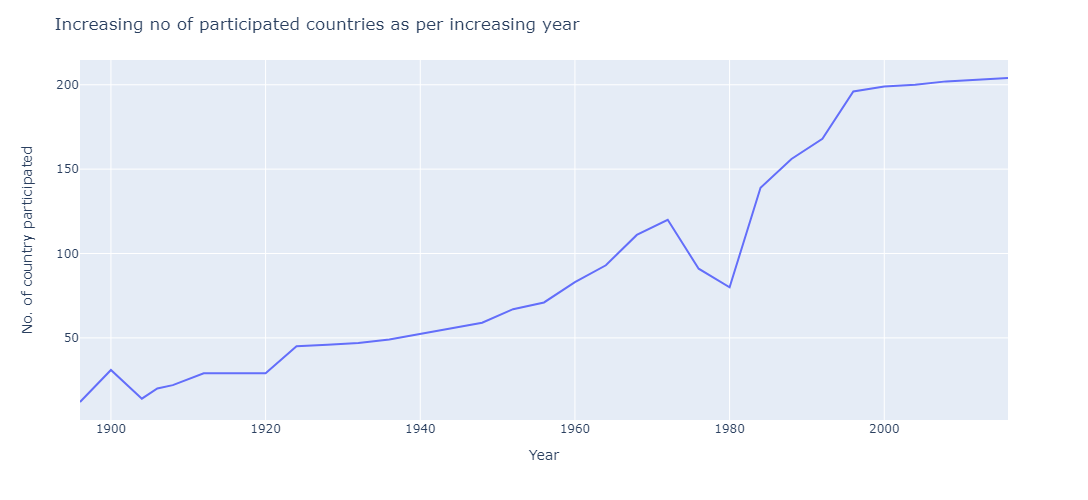

In [48]:
fig = px.line(nations_over_year, x ="Year", y= "No. of country participated", width=800, height=500)
fig.update_layout(title="Increasing no of participated countries as per increasing year")
fig.show()

## Number of events as per the years

In [49]:
events_over_year = df.drop_duplicates(["Year", "Event"]).value_counts(["Year"]).reset_index().sort_values("Year")
events_over_year.rename(columns={0:"No. of Events"}, inplace=True)
events_over_year

Year  No. of Events
28  1896             43
26  1900             90
25  1904             95
27  1906             74
23  1908            109
24  1912            107
14  1920            158
21  1924            131
22  1928            122
20  1932            131
18  1936            150
15  1948            153
19  1952            149
16  1956            151
17  1960            150
13  1964            163
12  1968            172
11  1972            193
10  1976            198
9   1980            203
8   1984            221
7   1988            237
6   1992            257
5   1996            271
4   2000            300
3   2004            301
2   2008            302
1   2012            302
0   2016            306

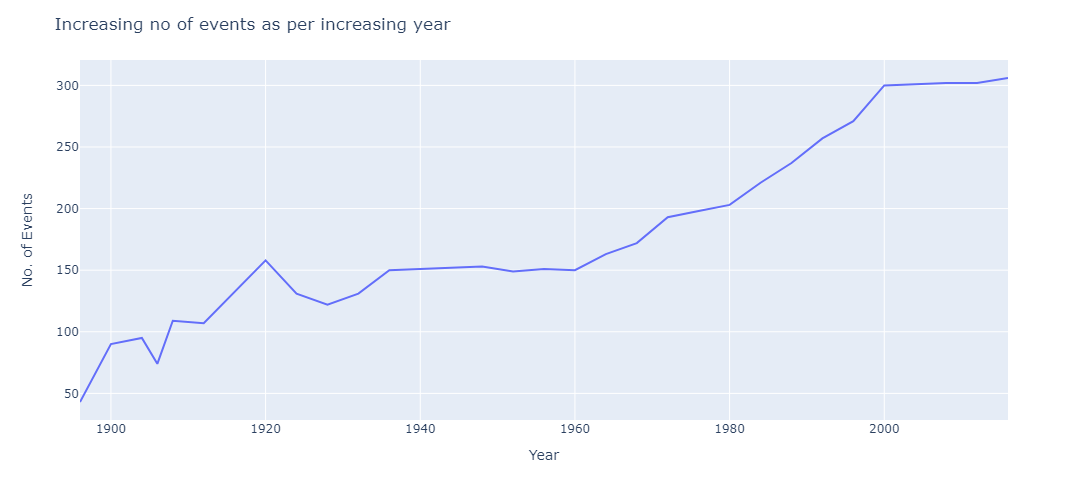

In [50]:
fig = px.line(events_over_year, x ="Year", y= "No. of Events", width=800, height=500)
fig.update_layout(title="Increasing no of events as per increasing year")
fig.show()

## Number of players as per the years

In [51]:
plyers_over_year = df.drop_duplicates(["Year", "Name"]).value_counts(["Year"]).reset_index().sort_values("Year")
plyers_over_year.rename(columns={0:"No. of Players"}, inplace=True)
plyers_over_year

Year  No. of Players
28  1896             176
25  1900            1220
27  1904             650
26  1906             841
23  1908            2024
22  1912            2409
21  1920            2675
19  1924            3256
20  1928            3246
24  1932            1922
16  1936            4482
17  1948            4402
15  1952            4931
18  1956            3346
12  1960            5348
14  1964            5134
11  1968            5552
8   1972            7105
10  1976            6070
13  1980            5252
9   1984            6791
7   1988            8443
6   1992            9380
5   1996           10324
2   2000           10639
3   2004           10537
1   2008           10880
4   2012           10502
0   2016           11174

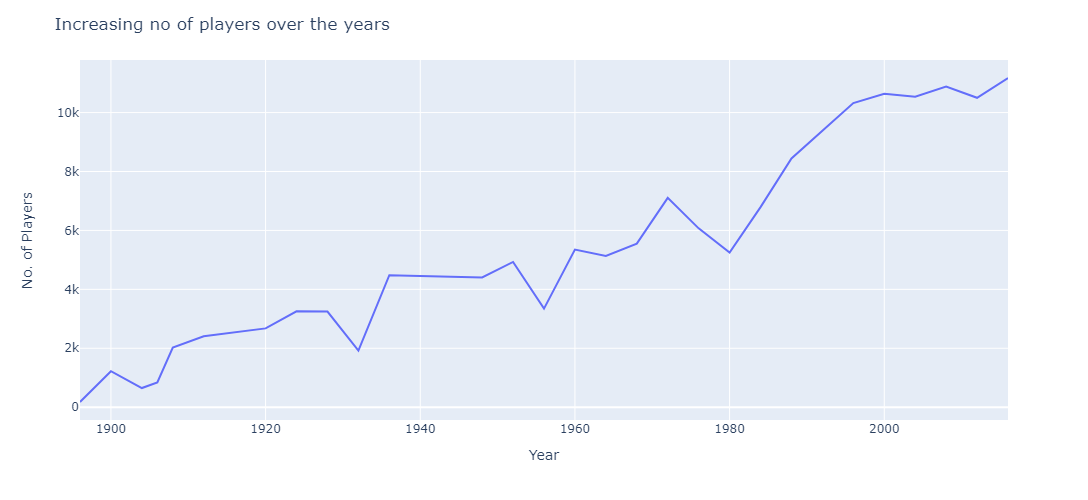

In [52]:
fig = px.line(plyers_over_year, x ="Year", y= "No. of Players", width=800, height=500)
fig.update_layout(title="Increasing no of players over the years")
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Sport'>

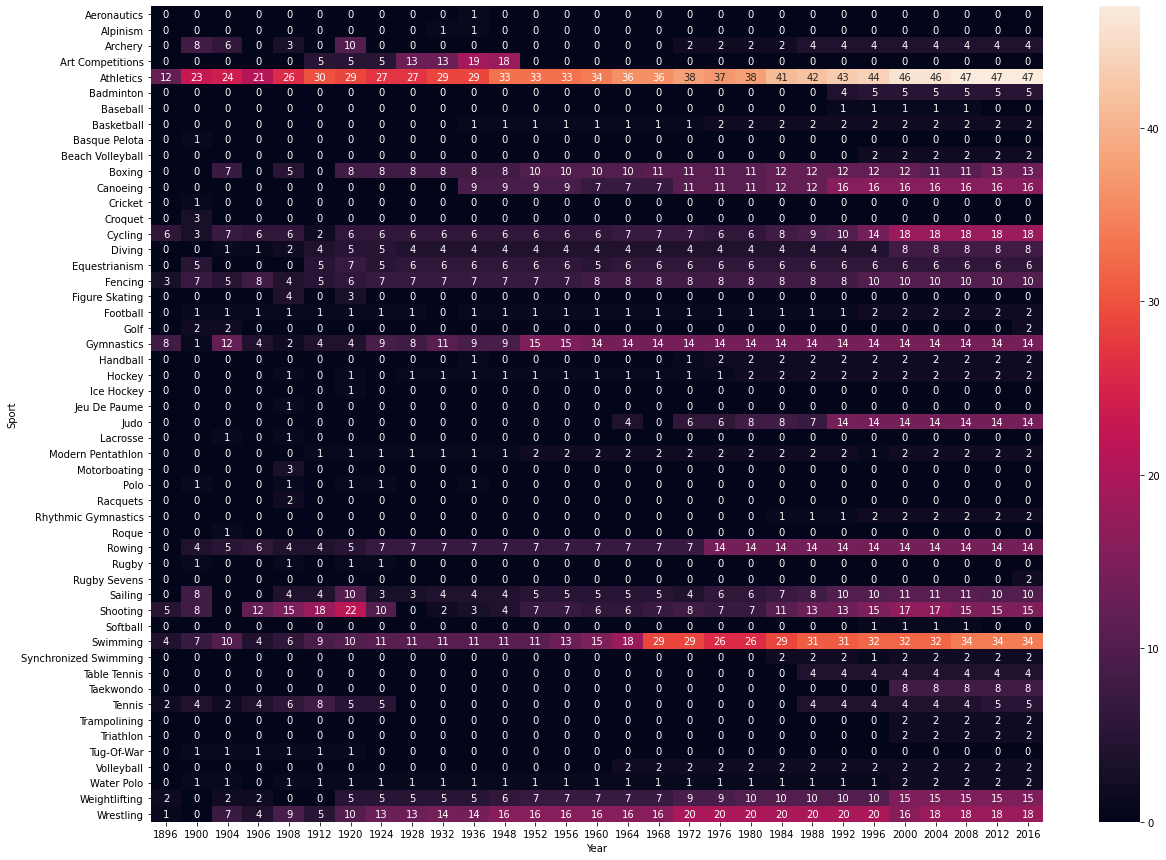

In [53]:
# headtmap showing number of events in each sport over the years
x = df.drop_duplicates(["Year", "Sport", "Event"])
plt.figure(figsize=(20,15))
sns.heatmap(x.pivot_table(index = "Sport" , columns="Year", values="Event", aggfunc= "count").fillna(0).astype(int), annot=True)

## Plotting most successful athelete overall plus as per particular sport

In [54]:
def most_successful(df, sport):
    temp_df = df.dropna(subset = ["Medal"])  #Automatically dropping all the rows who has no medals
     
    if sport != "Overall":
        temp_df = temp_df[temp_df["Sport"] == sport]
    
    return temp_df["Name"].value_counts()

In [55]:
most_successful(df, "Swimming") # Gives the player with most medals in particular sport

Michael Fred Phelps, II                            28
Natalie Anne Coughlin (-Hall)                      12
Dara Grace Torres (-Hoffman, -Minas)               12
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Ryan Steven Lochte                                 12
                                                   ..
Masato Sakai                                        1
Donald Graham Smith                                 1
Leslie "Les" Boardman                               1
William Albert "Bill" Yorzyk, Jr.                   1
Philomena Alecia "Bonnie" Mealing (-Johnston)       1
Name: Name, Length: 1657, dtype: int64

In [56]:
most_successful(df, "Overall") # Gives the most successful player with hightest medals

Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Edoardo Mangiarotti                   13
Takashi Ono                           13
                                      ..
Edward Skorek                          1
Katja Johanna Alice Nyberg             1
Walter Fernando Prez                   1
Randi Criner Miller                    1
Joshua "Josh" Culbreath                1
Name: Name, Length: 24545, dtype: int64

In [57]:
def most_successful(df, sport):
    temp_df = df.dropna(subset = ["Medal"])  #Automatically dropping all the rows who has no medals
     
    if sport != "Overall":
        temp_df = temp_df[temp_df["Sport"] == sport]
    
    return temp_df["Name"].value_counts().reset_index().head(10).merge(df, left_on="index", right_on="Name", how="left")[["index", "Name_x", "Sport",  
                                        "region"]].drop_duplicates("index")

In [58]:
most_successful(df, "Overall") # Top 15 most successfull atheletes in the hisstory of olympics accoridng to the sport thier region and the medals won.

index  Name_x       Sport  \
0                            Michael Fred Phelps, II      28    Swimming   
30                Larysa Semenivna Latynina (Diriy-)      18  Gymnastics   
49                      Nikolay Yefimovich Andrianov      15  Gymnastics   
73                               Edoardo Mangiarotti      13     Fencing   
87                                       Takashi Ono      13  Gymnastics   
120                      Borys Anfiyanovych Shakhlin      13  Gymnastics   
144  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12    Swimming   
161                                       Sawao Kato      12  Gymnastics   
185                    Natalie Anne Coughlin (-Hall)      12    Swimming   
197                               Ryan Steven Lochte      12    Swimming   

     region  
0       USA  
30   Russia  
49   Russia  
73    Italy  
87    Japan  
120  Russia  
144     USA  
161   Japan  
185     USA  
197     USA

In [59]:
# most successfull athelete as per Sport
def most_successful(df, sport):
    temp_df = df.dropna(subset = ["Medal"])  #Automatically dropping all the rows who has no medals
     
    if sport != "Overall":
        temp_df = temp_df[temp_df["Sport"] == sport]
    
    x = temp_df["Name"].value_counts().reset_index().head(10).merge(df, left_on="index", right_on="Name", how="left")[["index", "Name_x", "Sport",
                                                                                        "region"]].drop_duplicates("index")
    x.rename(columns={"index": "Name", "Name_x": "Medal"}, inplace=True)
    return x

In [60]:
most_successful(df, "Gymnastics")

Name  Medal       Sport          region
0    Larysa Semenivna Latynina (Diriy-)     18  Gymnastics          Russia
19         Nikolay Yefimovich Andrianov     15  Gymnastics          Russia
43                          Takashi Ono     13  Gymnastics           Japan
76          Borys Anfiyanovych Shakhlin     13  Gymnastics          Russia
100             Aleksey Yuryevich Nemov     12  Gymnastics          Russia
121                          Sawao Kato     12  Gymnastics           Japan
145              Vra slavsk (-Odloilov)     11  Gymnastics  Czech Republic
163           Viktor Ivanovych Chukarin     11  Gymnastics          Russia
179       Vitaly Venediktovich Shcherbo     10  Gymnastics          Russia
195     Aleksandr Nikolayevich Dityatin     10  Gymnastics          Russia

<hr>
<hr>

# Part 3 Country-wise-analysis
- Countrywise medal tally year(line plot)
- What countries are good at heatmap
- Most successful Atheletes(Top 10)

In [61]:
# Since I wanna do medal tallly countrywise i dont need those row whose medal value is nan
temp_df = df.dropna(subset=["Medal"])
# If someone won a gold in team sport then every member of that team is assigned with a gold which is techinically wrong so I am gonna handle them
temp_df.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"], inplace=True)

<ipython-input-61-4b6c18784cc3>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
new_df = temp_df[temp_df["region"] == "Nepal"]
final_df = new_df.groupby("Year").count()["Medal"].reset_index()

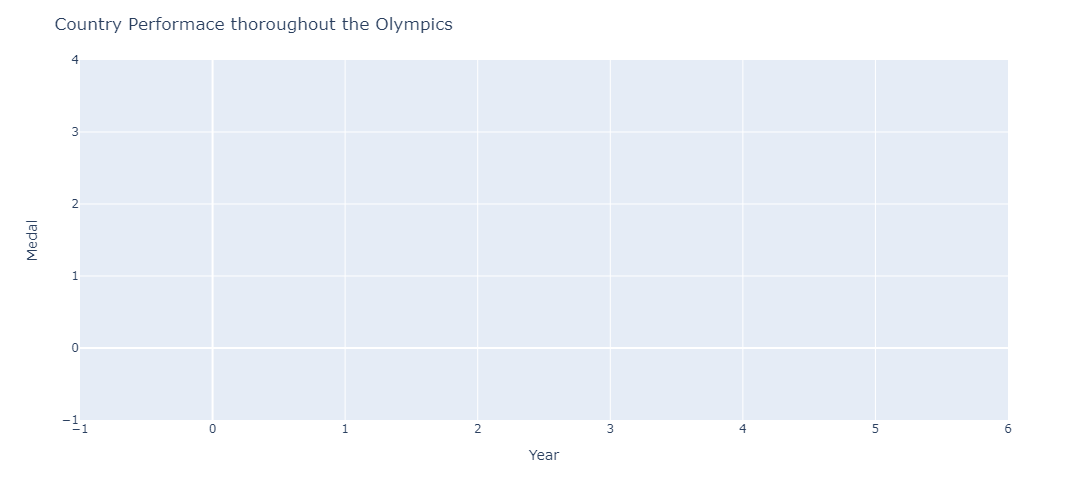

In [63]:
fig = px.line(final_df, x ="Year", y= "Medal", width=800, height=500)
fig.update_layout(title="Country Performace thoroughout the Olympics") # Sad Nepal has not won any
fig.show() 

In [64]:
new_df = temp_df[temp_df["region"] == "USA"]
final_df = new_df.groupby("Year").count()["Medal"].reset_index()

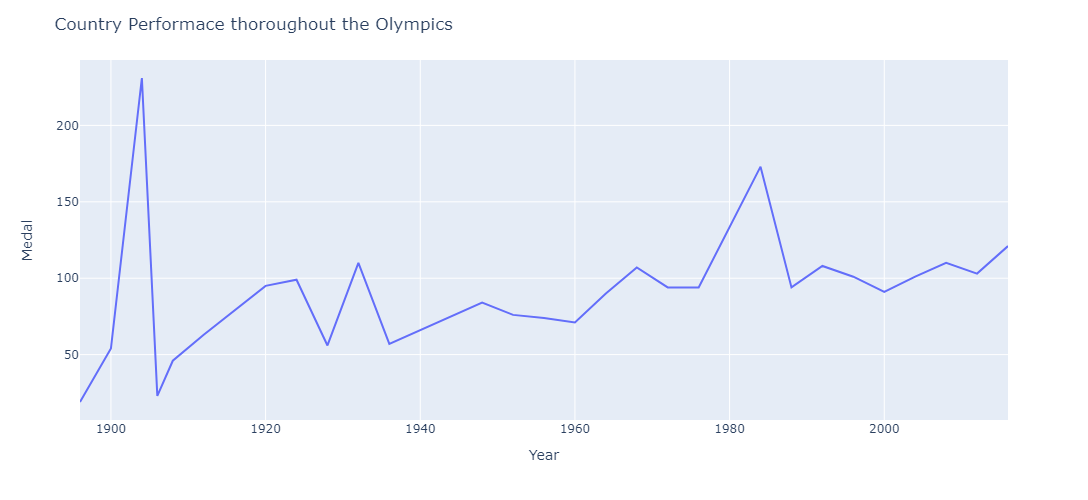

In [65]:
fig = px.line(final_df, x ="Year", y= "Medal", width=800, height=500)
fig.update_layout(title="Country Performace thoroughout the Olympics") # USA performance
fig.show() 

## Analyzing the performance of country throughout the years in each sport

<AxesSubplot:xlabel='Year', ylabel='Sport'>

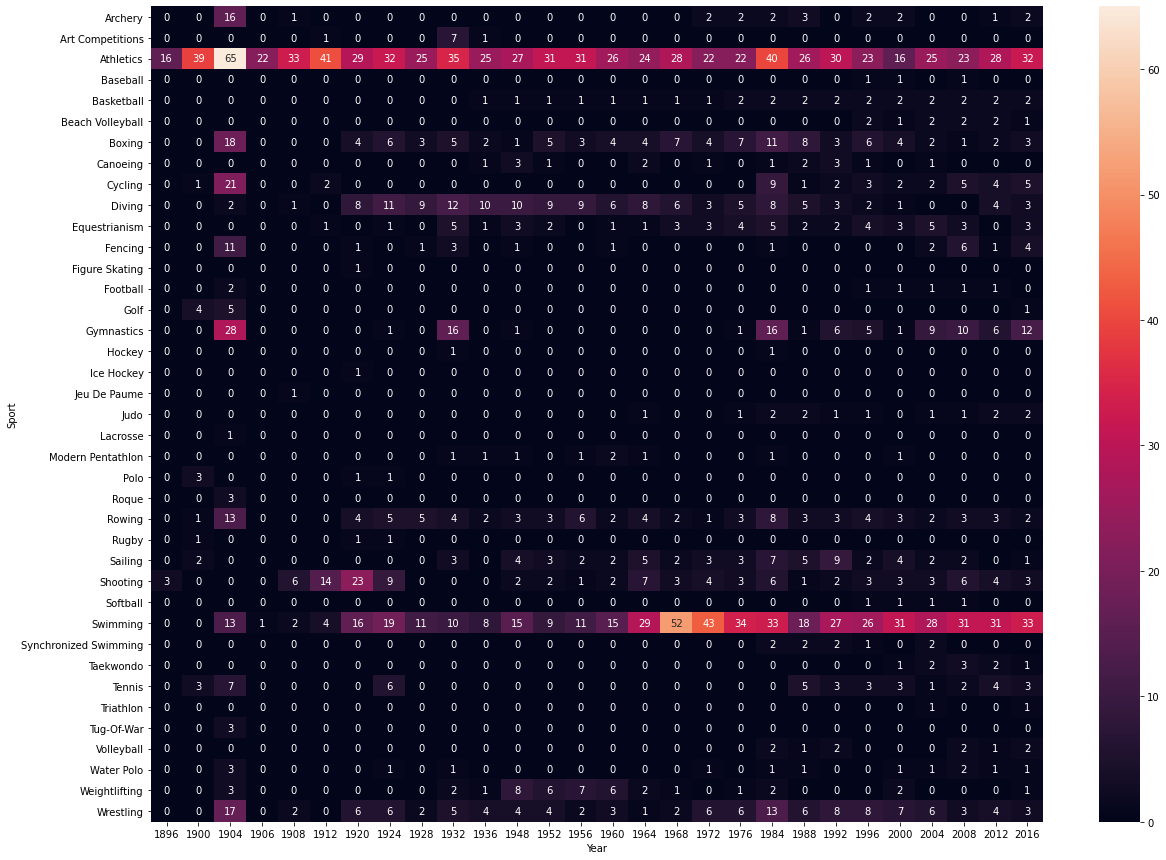

In [66]:
new_df = temp_df[temp_df["region"] == "USA"] # Usa perfomrance in each sport in each olympic
plt.figure(figsize=(20,15))
sns.heatmap(new_df.pivot_table(index="Sport", columns = "Year", values="Medal", aggfunc="count").fillna(0), annot=True)

## Analying the performances of the atheletes

In [67]:
def most_successful(df, country):
    temp_df = df.dropna(subset = ["Medal"])  #Automatically dropping all the rows who has no medals
     
    temp_df = temp_df[temp_df["region"] == country]
    
    return temp_df["Name"].value_counts().reset_index().head(10).merge(df, left_on="index", right_on="Name", how="left")[["index", "Name_x", 
                                                                                                            "Sport"]].drop_duplicates("index")

In [68]:
most_successful(df, "China") # Top 10 athelees in china (overall) analysis

index  Name_x                  Sport
0        Wu Minxia       7                 Diving
7         Yang Wei       7              Badminton
33       Wang Yifu       6               Shooting
43         Zou Kai       6             Gymnastics
51        Sun Yang       6               Swimming
61    Guo Jingjing       6                 Diving
68         Li Ning       6             Gymnastics
84   Li Xiaoshuang       6             Gymnastics
100       Wang Hao       6           Table Tennis
111  Huang Xuechen       5  Synchronized Swimming

<hr>
<hr>

# Part 4 Athelete-wise-analysis

In [69]:
import plotly.figure_factory as ff 

In [70]:
athelete_df = df.drop_duplicates(subset = ["Name", "region"])

In [74]:
x1 = athelete_df["Age"].dropna()
x2 = athelete_df[athelete_df["Medal"] == "Gold"]["Age"].dropna()
x3 = athelete_df[athelete_df["Medal"] == "Silver"]["Age"].dropna()
x4 = athelete_df[athelete_df["Medal"] == "Bronze"]["Age"].dropna()

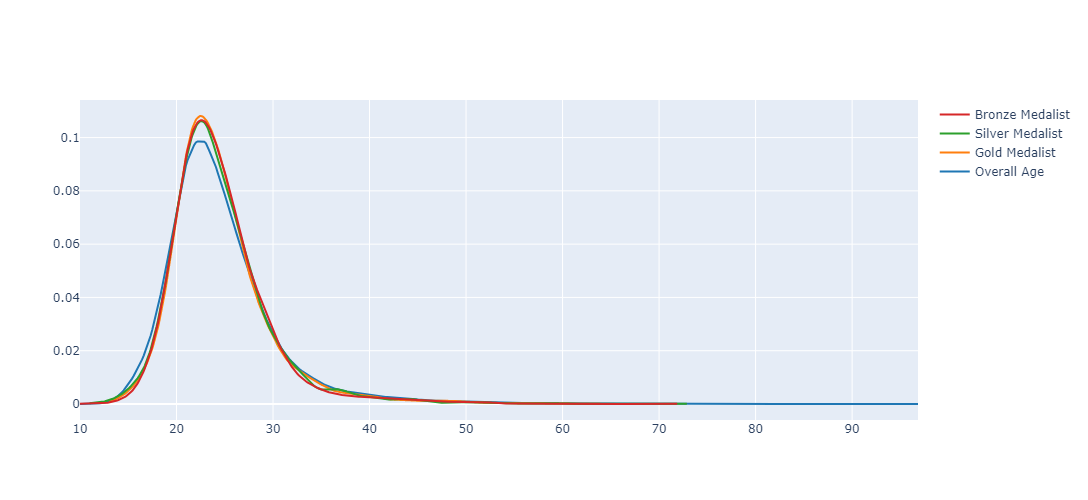

In [87]:
fig = ff.create_distplot([x1, x2, x3, x4], ["Overall Age", "Gold Medalist", "Silver Medalist", "Bronze Medalist"], show_hist=False, show_rug=False)
fig.update_layout(width=1000, height=500)
fig.show()# Pdf of age distributio
# From the plot it can be said that the maxmum probability of an athelete to land any of the medal is betwwen early 21 to late 22

## PLot to visualize distribution of age as per different sport played over the Olympics

In [115]:
x = []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [116]:
    for sport in famous_sports:
        athelete_sport_df = df.drop_duplicates(subset=["Name", "region"])
        temp_df = athelete_sport_df[athelete_sport_df['Sport'] == sport]
        gold_medalists = temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna()
        if not gold_medalists.empty:
            x.append(gold_medalists)
            name.append(sport)

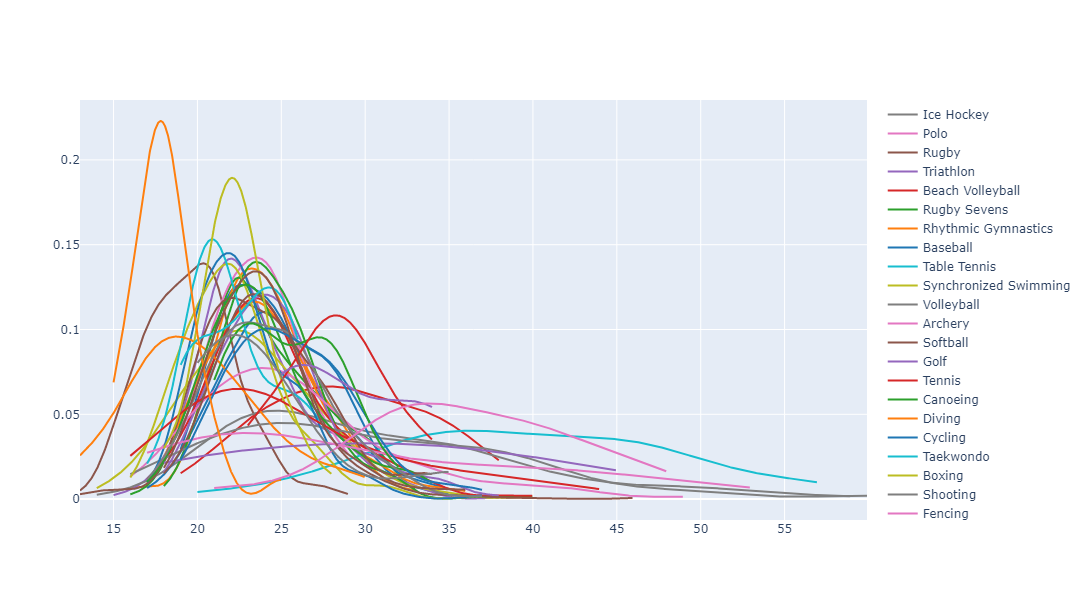

In [118]:
fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.update_layout(autosize=False, width=1000, height=600)
fig.show()

## PLot to visualize distribution of height and weight as per different sport played over the Olympics

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Distribution of height and weight of enitre atheletes in the Olympics till 2016')

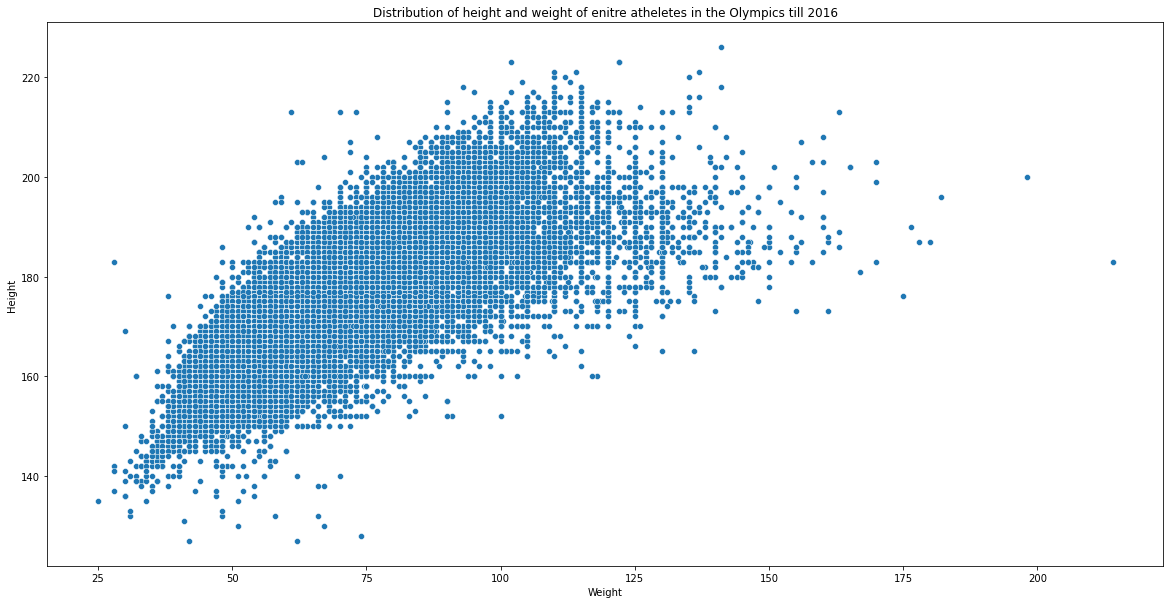

In [136]:
athelete_df["Medal"].fillna("No Medal", inplace=True)
plt.figure(figsize=(20,10))
sns.scatterplot(athelete_df["Weight"], athelete_df["Height"])
plt.title("Distribution of height and weight of enitre atheletes in the Olympics till 2016")

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Distribution of height and weight of enitre atheletes in the Olympics till 2016 for the sport Swimming')

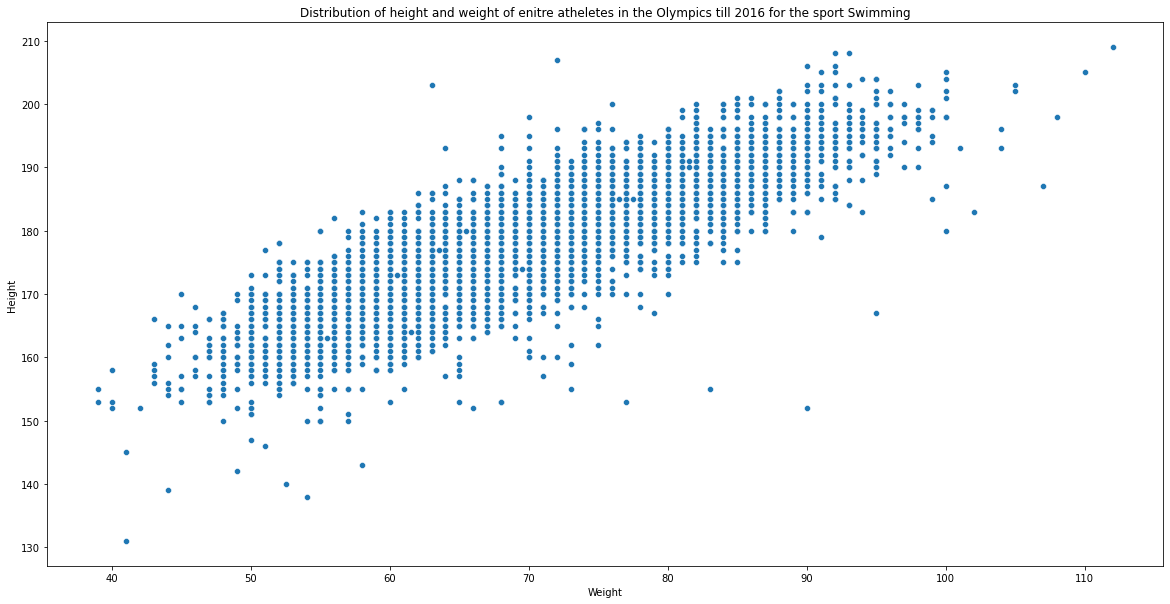

In [137]:
athelete_df["Medal"].fillna("No Medal", inplace=True)
plt.figure(figsize=(20,10))
sport = athelete_df[athelete_df["Sport"] == "Swimming"]
sns.scatterplot(sport["Weight"], sport["Height"])
plt.title("Distribution of height and weight of enitre atheletes in the Olympics till 2016 for the sport Swimming")

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Distribution of height and weight of enitre atheletes in the Olympics till 2016 with medal won')

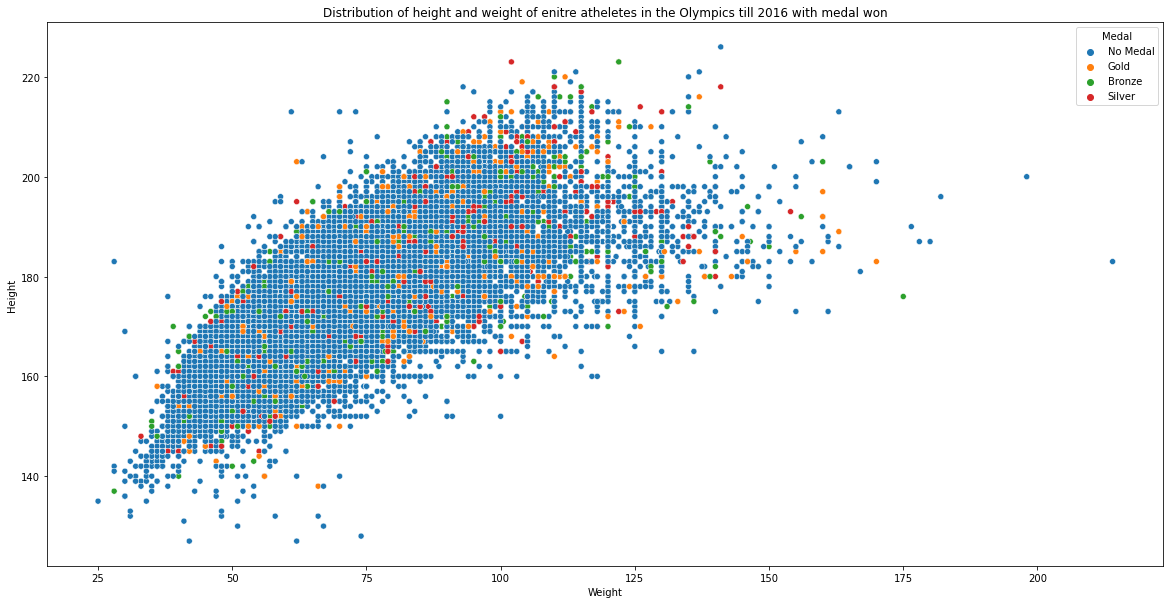

In [138]:
athelete_df["Medal"].fillna("No Medal", inplace=True)
plt.figure(figsize=(20,10))
sns.scatterplot(athelete_df["Weight"], athelete_df["Height"], hue=athelete_df["Medal"])
plt.title("Distribution of height and weight of enitre atheletes in the Olympics till 2016 with medal won")

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Distribution of height and weight of enitre atheletes in the Olympics till 2016 for the sport Swimming')

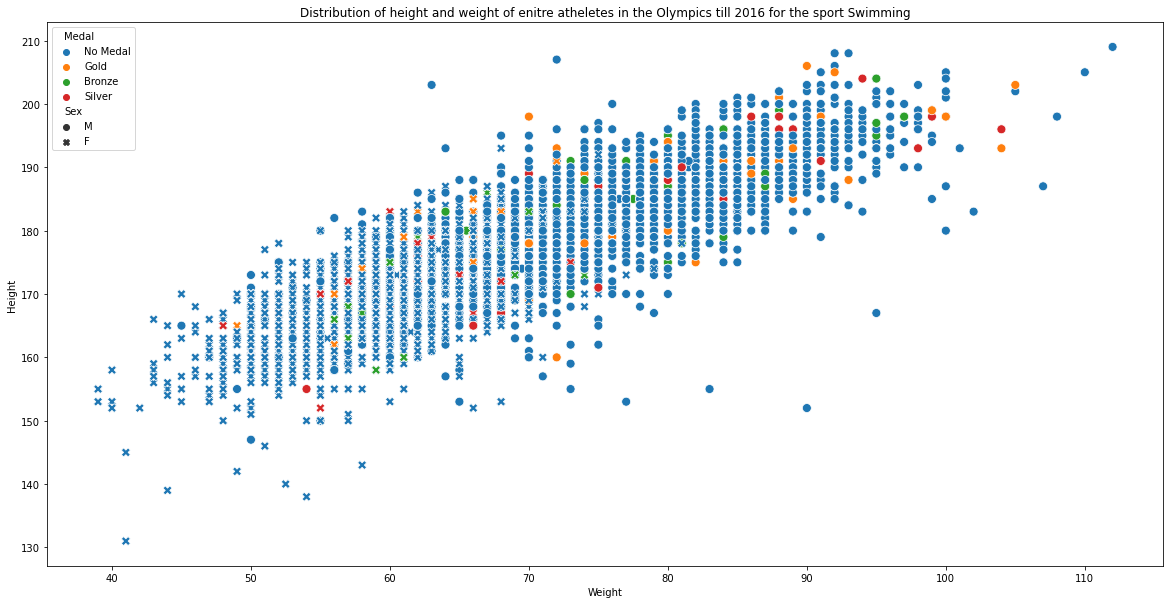

In [139]:
# to check athelthes who won medal in swimming only
athelete_df["Medal"].fillna("No Medal", inplace=True)
plt.figure(figsize=(20,10))
sport = athelete_df[athelete_df["Sport"] == "Swimming"]
sns.scatterplot(sport["Weight"], sport["Height"], hue=athelete_df["Medal"], style=athelete_df["Sex"], s=80)
plt.title("Distribution of height and weight of enitre atheletes in the Olympics till 2016 for the sport Swimming")

## Participation of men and female along the years of Olympics

In [179]:
male = athelete_df[athelete_df["Sex"] == "M"].groupby("Year").count() # first filtering out only Males form the dataset and then group by with
                                                                            # year which gives the total value of each colum for every year for Male
                                                                            # only.
male

ID  Name   Sex   Age  Height  Weight  Team   NOC  Games  Season  City  \
Year                                                                            
1896   174   174   174    72      13      13   174   174    174     174   174   
1900  1181  1181  1181   611      48      35  1181  1181   1181    1181  1181   
1904   629   629   629   481      76      66   629   629    629     629   629   
1906   759   759   759   330      65      56   759   759    759     759   759   
1908  1772  1772  1772  1319     194     240  1772  1772   1772    1772  1772   
1912  1978  1978  1978  1893     289     271  1978  1978   1978    1978  1978   
1920  2280  2280  2280  1755     367     270  2280  2280   2280    2280  2280   
1924  2535  2535  2535  1937     433     379  2535  2535   2535    2535  2535   
1928  2342  2342  2342  1832     410     336  2342  2342   2342    2342  2342   
1932  1382  1382  1382  1174     476     204  1382  1382   1382    1382  1382   
1936  3539  3539  3539  3404     494     504  3539  3539   3539    3539  3539   
1948  3629  3629  3629  2820     600     652  3629  3629   3629    3629  3629   
1952  3468  3468  3468  3306     837     854  3468  3468   3468    3468  3468   
1956  2193  2193  2193  1781     915     922  2193  2193   2193    2193  2193   
1960  3755  3755  3755  3645    3609    3579  3755  3755   3755    3755  3755   
1964  3290  3290  3290  3256    3118    3115  3290  3290   3290    3290  3290   
1968  3555  3555  3555  3474    3482    3482  3555  3555   3555    3555  3555   
1972  4552  4552  4552  4476    4403    4355  4552  4552   4552    4552  4552   
1976  3320  3320  3320  3295    3140    3142  3320  3320   3320    3320  3320   
1980  3151  3151  3151  3003    2963    2984  3151  3151   3151    3151  3151   
1984  4299  4299  4299  4144    3972    3979  4299  4299   4299    4299  4299   
1988  4704  4704  4704  4630    4473    4497  4704  4704   4704    4704  4704   
1992  4769  4769  4769  4745    3492    3569  4769  4769   4769    4769  4769   
1996  4811  4811  4811  4811    4040    4118  4811  4811   4811    4811  4811   
2000  4294  4294  4294  4294    4233    4227  4294  4294   4294    4294  4294   
2004  3931  3931  3931  3931    3907    3905  3931  3931   3931    3931  3931   
2008  3990  3990  3990  3990    3896    3918  3990  3990   3990    3990  3990   
2012  3679  3679  3679  3679    3577    3504  3679  3679   3679    3679  3679   
2016  4022  4022  4022  4022    3920    3905  4022  4022   4022    4022  4022   

      Sport  Event  Medal  region  notes  Bronze  Gold  Silver  
Year                                                            
1896    174    174    174     174      0     174   174     174  
1900   1181   1181   1181    1181      6    1181  1181    1181  
1904    629    629    629     629      1     629   629     629  
1906    759    759    759     759     21     759   759     759  
1908   1772   1772   1772    1772     41    1772  1772    1772  
1912   1978   1978   1978    1976     56    1978  1978    1978  
1920   2280   2280   2280    2280     15    2280  2280    2280  
1924   2535   2535   2535    2535     38    2535  2535    2535  
1928   2342   2342   2342    2342     29    2342  2342    2342  
1932   1382   1382   1382    1382      0    1382  1382    1382  
1936   3539   3539   3539    3539     72    3539  3539    3539  
1948   3629   3629   3629    3628     79    3629  3629    3629  
1952   3468   3468   3468    3464     74    3468  3468    3468  
1956   2193   2193   2193    2146     31    2193  2193    2193  
1960   3755   3755   3755    3752    189    3755  3755    3755  
1964   3290   3290   3290    3290     95    3290  3290    3290  
1968   3555   3555   3555    3551     68    3555  3555    3555  
1972   4552   4552   4552    4547    124    4552  4552    4552  
1976   3320   3320   3320    3317    115    3320  3320    3320  
1980   3151   3151   3151    3151    103    3151  3151    3151  
1984   4299   4299   4299    4294    150    4299  4299    4299  
1

In [180]:
male = athelete_df[athelete_df["Sex"] == "M"].groupby("Year").count()["Name"].reset_index()# only from the above table taking only the
                                                                                                         # year and name(name contains total no of male
                                                                                                          # in that particular year)
male

Year  Name
0   1896   174
1   1900  1181
2   1904   629
3   1906   759
4   1908  1772
5   1912  1978
6   1920  2280
7   1924  2535
8   1928  2342
9   1932  1382
10  1936  3539
11  1948  3629
12  1952  3468
13  1956  2193
14  1960  3755
15  1964  3290
16  1968  3555
17  1972  4552
18  1976  3320
19  1980  3151
20  1984  4299
21  1988  4704
22  1992  4769
23  1996  4811
24  2000  4294
25  2004  3931
26  2008  3990
27  2012  3679
28  2016  4022

In [181]:
# Simillarly for female
female = athelete_df[athelete_df["Sex"] == "F"].groupby("Year").count()["Name"].reset_index()
female

Year  Name
0   1900    23
1   1904     6
2   1906     6
3   1908    44
4   1912    53
5   1920    73
6   1924   132
7   1928   285
8   1932   162
9   1936   316
10  1948   420
11  1952   409
12  1956   288
13  1960   473
14  1964   507
15  1968   599
16  1972   818
17  1976  1028
18  1980   875
19  1984  1368
20  1988  1734
21  1992  2080
22  1996  2518
23  2000  2790
24  2004  2820
25  2008  2947
26  2012  2919
27  2016  3209

In [182]:
gender = male.merge(female, on ="Year", how="left") # Adding tow dataframe with commone column
gender = gender.rename(columns = {"Name_x": "Male", "Name_y": "Female" })
gender.fillna(0, inplace=True)
gender

Year  Male  Female
0   1896   174     0.0
1   1900  1181    23.0
2   1904   629     6.0
3   1906   759     6.0
4   1908  1772    44.0
5   1912  1978    53.0
6   1920  2280    73.0
7   1924  2535   132.0
8   1928  2342   285.0
9   1932  1382   162.0
10  1936  3539   316.0
11  1948  3629   420.0
12  1952  3468   409.0
13  1956  2193   288.0
14  1960  3755   473.0
15  1964  3290   507.0
16  1968  3555   599.0
17  1972  4552   818.0
18  1976  3320  1028.0
19  1980  3151   875.0
20  1984  4299  1368.0
21  1988  4704  1734.0
22  1992  4769  2080.0
23  1996  4811  2518.0
24  2000  4294  2790.0
25  2004  3931  2820.0
26  2008  3990  2947.0
27  2012  3679  2919.0
28  2016  4022  3209.0

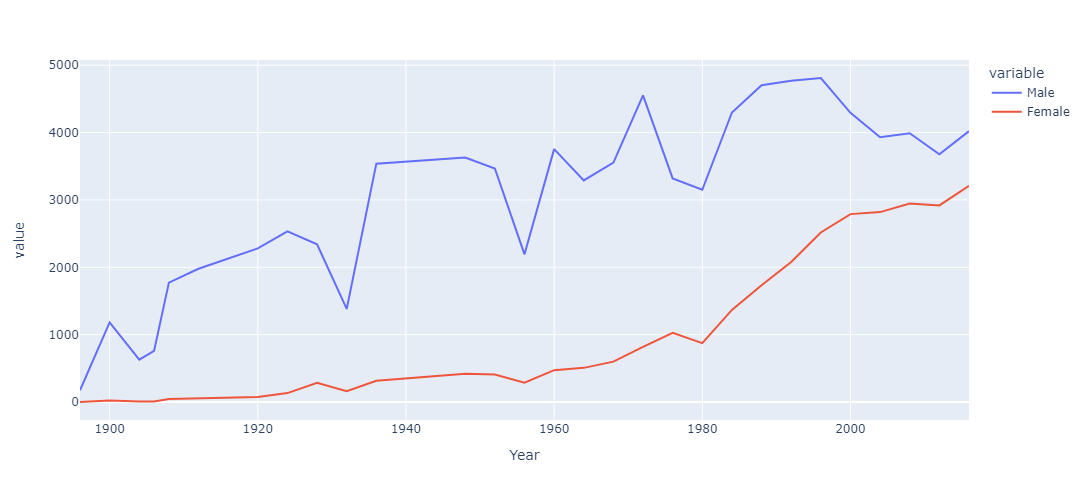

In [189]:
fig = px.line(gender, x="Year", y=["Male", "Female"])
fig.update_layout(width=1000, height=500)
fig.show()